In [1]:
import pytz
import os
import sqlite3
import re
import uproot
import IPython
import sys
import copy
import numpy as np
import pandas as pd
import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandasql import sqldf
from rnog_data.runtable import RunTable
from datetime import datetime, timedelta
from matplotlib.ticker import MaxNLocator
from scipy.fft import fft
from scipy.signal import stft
from NuRadioReco.modules.io.RNO_G.readRNOGDataMattak import readRNOGData
from NuRadioReco.utilities import units
from Flight import Flight
from IPython.display import clear_output


pd.options.display.float_format = '{:20,.15f}'.format
#-------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------
from FlightTracker import FlightTracker

tracker = FlightTracker('2022-08-17 00:00:00')
tracker.flights_distinct

,index,flightnumber,date,filename,mintime,maxtime,min_r,min_z,theta
0,0,JAL41,2022-08-17,2022.08.17-045206.db,2022-08-17 01:46:16.400000,2022-08-17 02:06:17.300000,12.500000000000000,10.199999999999999,40.000000000000000
1,1,N/A,2022-08-17,2022.08.17-045206.db,2022-08-17 02:01:30.900000,2022-08-17 02:02:56.300000,83.700000000000003,11.000000000000000,40.000000000000000
2,2,N/A,2022-08-17,2022.08.17-045206.db,2022-08-17 10:38:51.800000,2022-08-17 14:59:22.800000,0.600000000000000,0.000000000000000,36.000000000000000
3,3,JAL45,2022-08-17,2022.08.18-045211.db,2022-08-17 10:22:47.100000,2022-08-17 10:41:12.500000,12.500000000000000,10.199999999999999,40.000000000000000
4,4,N/A,2022-08-17,2022.08.18-045211.db,2022-08-17 02:01:30.900000,2022-08-17 02:02:56.300000,83.700000000000003,11.000000000000000,40.000000000000000
5,5,N/A,2022-08-17,2022.08.18-045211.db,2022-08-17 10:38:51.800000,2022-08-17 14:59:22.800000,0.600000000000000,0.000000000000000,36.000000000000000
6,6,JAL43,2022-08-17,2022.08.18-045211.db,2022-08-17 10:39:11.900000,2022-08-17 10:59:52.900000,11.300000000000001,8.900000000000000,40.000000000000000
7,7,JAL407,2022-08-17,2022.08.18-045211.db,2022-08-17 11:02:28.700000,2022-08-17 11:22:14.400000,12.500000000000000,10.199999999999999,40.000000000000000
8,8,ANA211,2022-08-17,2022.08.18-045211.db,2022-08-17 11:03:03.800000,2022-08-17 11:23:34.800000,11.300000000000001,8.900000000000000,40.000000000000000
9,9,ANA231,2022-08-17,2022.08.18-045211.db,2022-08-17 12:39:21.900000,2022-08-17 12:58:02.400000,12.500000000000000,10.199999999999999,40.000000000000000


In [2]:
JAL43 = tracker.get_flight_by_index(6, filetype = 'combined.root')
temp_df = JAL43.header_df
temp_df

INFO:runtable_database:database connection to RNOG_live established


,station_number,run_number,event_number,trigger_time,radiant_triggers,lt_triggers,force_triggers,l1_max,amp_max,SNR_max,RMS_max,cw,impulsive
0,11,1239,81,"1,660,732,872.918136119842529",False,True,False,0.031120638483670,0.044621569163664,4.520528077279003,0.012177881471143,0,0
1,11,1239,130,"1,660,733,052.299342155456543",False,True,False,0.039152764975125,0.045210999743424,5.178676319294213,0.012177881471143,0,0
2,11,1239,137,"1,660,733,076.948019504547119",False,True,False,0.033919502518368,0.041161064537621,5.102451382615014,0.012177881471143,0,0
3,11,1239,197,"1,660,733,275.414947271347046",False,True,False,0.032026284790483,0.048849548176253,4.769805596921439,0.012177881471143,0,0
4,11,1239,201,"1,660,733,292.764861583709717",False,True,False,0.029114272005214,0.042700189144077,5.191883371015343,0.012177881471143,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24,385,1979,"1,660,733,734.810653686523438",False,False,True,0.042698684540711,0.049052200475732,4.707745860995797,0.013064608273873,0,0
148,24,385,2067,"1,660,733,882.768832206726074",False,True,False,0.029297129684787,0.049614621278929,5.596813316044488,0.013064608273873,0,0
149,24,385,2077,"1,660,733,890.448921442031860",False,True,False,0.028502468462884,0.051089555841694,5.104348902636646,0.013064608273873,0,0
150,24,385,2080,"1,660,733,901.856907129287720",False,True,False,0.022772362091504,0.052002875830833,4.557269060749178,0.013064608273873,0,0


In [3]:
JAL43.header_df

""


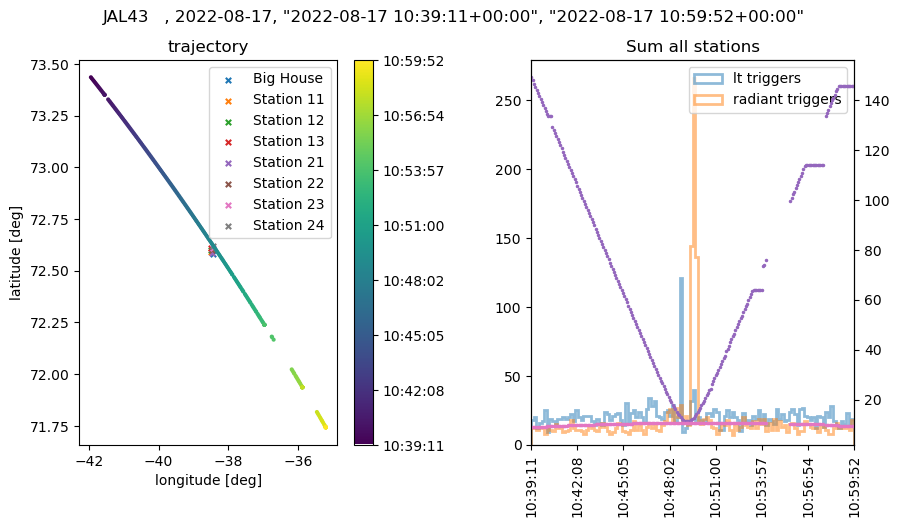

In [4]:
test = tracker.get_flight_by_index(6)
test.plot_flight()

In [5]:
# add fk_date_flightnumber
flights_distinct = tracker.flights_distinct[tracker.flights_distinct.flightnumber == 'JAL43   ']
flights_distinct = sqldf(''' 
SELECT
    *
    ,date || '_' || flightnumber as fk_date_flightnumber
FROM flights_distinct
''')
flights = tracker.flights[tracker.flights.flightnumber == 'JAL43   ']
flights = sqldf(''' 
SELECT
    *
    ,date(readtime) || '_' || flightnumber as fk_date_flightnumber
FROM flights
''')


flights_distinct['mintime'] = pd.to_datetime(flights_distinct.mintime).dt.tz_localize('UTC')
flights_distinct['maxtime'] = pd.to_datetime(flights_distinct.maxtime).dt.tz_localize('UTC')

flights_distinct['mintime_millis'] = flights_distinct.mintime.astype(np.int64) // 10 ** 6
flights_distinct['maxtime_millis'] = flights_distinct.maxtime.astype(np.int64) // 10 ** 6

flights_distinct['mintime_sec'] = flights_distinct.mintime.astype(np.int64) // 10 ** 9
flights_distinct['maxtime_sec'] = flights_distinct.maxtime.astype(np.int64) // 10 ** 9

flights_distinct['ID'] = flights_distinct.index

temp_df['trigger_time_millis'] = (temp_df['trigger_time'] * (10 ** 3)).astype(np.int64)
temp_df['trigger_time_sec'] = (temp_df['trigger_time']).astype(np.int64)

flights_distinct

KeyError: 'trigger_time'

In [4]:
fk_timestamp = pd.DataFrame(columns = ['trigger_time_sec'], data = range(flights_distinct.mintime_millis.min() // 1000, flights_distinct.maxtime_millis.max() // 1000, 1))
fk_timestamp

,trigger_time_sec
0,1660732751
1,1660732752
2,1660732753
3,1660732754
4,1660732755
...,...
1236,1660733987
1237,1660733988
1238,1660733989
1239,1660733990


In [8]:
query = ''' 
SELECT
    count(trigger_time_sec) as sum_triggers_per_second
    --,station_number
    ,trigger_time_sec
    ,impulsive
    --,CASE 
    --    WHEN force_triggers = 1 THEN 1
    --    WHEN lt_triggers = 1 THEN 2
    --    WHEN radiant_triggers = 1 THEN 3
    --    ELSE -1
    --END AS trigger_type
    ,force_triggers
    ,lt_triggers
    ,radiant_triggers
    --,trigger_time_millis
FROM temp_df
Where impulsive = 1
and radiant_triggers = 1
--and lt_triggers = 1
--GROUP BY station_number, trigger_time_sec

GROUP BY trigger_time_sec
'''

test = sqldf(query)
test

,sum_triggers_per_second,trigger_time_sec,impulsive,force_triggers,lt_triggers,radiant_triggers
0,1,1660732776,1,0,0,1
1,1,1660732802,1,0,0,1
2,1,1660732839,1,0,0,1
3,1,1660732866,1,0,0,1
4,1,1660732887,1,0,0,1
5,1,1660732922,1,0,0,1
6,1,1660732953,1,0,0,1
7,1,1660733137,1,0,0,1
8,1,1660733259,1,0,0,1
9,1,1660733320,1,0,0,1


In [9]:
fk_timestamp = fk_timestamp.merge(test, on=['trigger_time_sec'], how='left')

In [10]:
fk_timestamp

,trigger_time_sec,sum_triggers_per_second,impulsive,force_triggers,lt_triggers,radiant_triggers
0,1660732751,NaN,NaN,NaN,NaN,NaN
1,1660732752,NaN,NaN,NaN,NaN,NaN
2,1660732753,NaN,NaN,NaN,NaN,NaN
3,1660732754,NaN,NaN,NaN,NaN,NaN
4,1660732755,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1236,1660733987,NaN,NaN,NaN,NaN,NaN
1237,1660733988,NaN,NaN,NaN,NaN,NaN
1238,1660733989,NaN,NaN,NaN,NaN,NaN
1239,1660733990,NaN,NaN,NaN,NaN,NaN


In [11]:
fk_timestamp.sum_triggers_per_second.fillna(0, inplace = True)
#fk_timestamp.station_number.fillna(-1, inplace=True)
#fk_timestamp.force_triggers.fillna(-1, inplace=True)

In [12]:
fk_timestamp

,trigger_time_sec,sum_triggers_per_second,impulsive,force_triggers,lt_triggers,radiant_triggers
0,1660732751,0.000000000000000,NaN,NaN,NaN,NaN
1,1660732752,0.000000000000000,NaN,NaN,NaN,NaN
2,1660732753,0.000000000000000,NaN,NaN,NaN,NaN
3,1660732754,0.000000000000000,NaN,NaN,NaN,NaN
4,1660732755,0.000000000000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1236,1660733987,0.000000000000000,NaN,NaN,NaN,NaN
1237,1660733988,0.000000000000000,NaN,NaN,NaN,NaN
1238,1660733989,0.000000000000000,NaN,NaN,NaN,NaN
1239,1660733990,0.000000000000000,NaN,NaN,NaN,NaN


In [13]:
fk_timestamp['sum_triggers_per_second'] = fk_timestamp.sum_triggers_per_second.astype('uint16')

In [14]:
# join header information on flights_distinct
query = '''
SELECT 
    flightnumber
    ,fk_date_flightnumber
    --,station_number
    ,sum_triggers_per_second
    ,trigger_time_sec
FROM flights_distinct
LEFT JOIN ( 
            SELECT
                *
            FROM fk_timestamp
)t0

ON t0.trigger_time_sec > flights_distinct.mintime_sec
AND t0.trigger_time_sec < flights_distinct.maxtime_sec
WHERE trigger_time_sec is not null
and min_r < 50
--AND force_triggers = 0
--AND lt_triggers = 1
--AND radiant_triggers = 1
--GROUP BY fk_date_flightnumber, station_number, trigger_time_sec
GROUP BY fk_date_flightnumber, trigger_time_sec
'''

result = sqldf(query)
clear_output(wait=True)
result

,flightnumber,fk_date_flightnumber,sum_triggers_per_second,trigger_time_sec
0,JAL43,2022-08-17_JAL43,0,1660732752
1,JAL43,2022-08-17_JAL43,0,1660732753
2,JAL43,2022-08-17_JAL43,0,1660732754
3,JAL43,2022-08-17_JAL43,0,1660732755
4,JAL43,2022-08-17_JAL43,0,1660732756
...,...,...,...,...
1235,JAL43,2022-08-17_JAL43,0,1660733987
1236,JAL43,2022-08-17_JAL43,0,1660733988
1237,JAL43,2022-08-17_JAL43,0,1660733989
1238,JAL43,2022-08-17_JAL43,0,1660733990


In [15]:
sqldf('Select count(trigger_time_sec) as count, trigger_time_sec, GROUP_CONCAT(flightnumber ) AS flightnumbers  from result group By trigger_time_sec order by count desc')

,count,trigger_time_sec,flightnumbers
0,1,1660733991,JAL43
1,1,1660733990,JAL43
2,1,1660733989,JAL43
3,1,1660733988,JAL43
4,1,1660733987,JAL43
...,...,...,...
1235,1,1660732756,JAL43
1236,1,1660732755,JAL43
1237,1,1660732754,JAL43
1238,1,1660732753,JAL43


In [16]:
query = '''
SELECT 
    *
FROM (
    SELECT count(trigger_time_sec) as count
    ,trigger_time_sec
    FROM result
    GROUP BY trigger_time_sec
)t0
WHERE count > 1
ORDER BY trigger_time_sec

'''

timestamps_to_exclude = sqldf(query)
timestamps_to_exclude

,count,trigger_time_sec


In [17]:
result = result[~result['trigger_time_sec'].isin(timestamps_to_exclude['trigger_time_sec'])]
result = result[~result['flightnumber'].str.contains('SKI', na=False)]
result = result[~result['flightnumber'].str.contains('RCH108', na=False)]
result = result[~result['flightnumber'].str.contains('N/A', na=False)]
result

,flightnumber,fk_date_flightnumber,sum_triggers_per_second,trigger_time_sec
0,JAL43,2022-08-17_JAL43,0,1660732752
1,JAL43,2022-08-17_JAL43,0,1660732753
2,JAL43,2022-08-17_JAL43,0,1660732754
3,JAL43,2022-08-17_JAL43,0,1660732755
4,JAL43,2022-08-17_JAL43,0,1660732756
...,...,...,...,...
1235,JAL43,2022-08-17_JAL43,0,1660733987
1236,JAL43,2022-08-17_JAL43,0,1660733988
1237,JAL43,2022-08-17_JAL43,0,1660733989
1238,JAL43,2022-08-17_JAL43,0,1660733990


In [18]:
distinct_fk_date_flightnumber = sqldf("Select distinct fk_date_flightnumber from result")

In [19]:
#-------------------------------------------------------------------------------------------------------------------
def part_lin(x, times, r):
    return_linspace = []
    for element in x:
        #print()
        #print(times, element)
        #print(np.where(times <= element))
        #print()
        index = np.where(times <= element)[0][-1]
        if index >= (len(times) - 1):
            index = index - 1
            print(f'Index {index} out of range {len(times) - 1}')
        y2 = r.iloc[index+1]
        y1 = r.iloc[index]
        x2 = times.iloc[index+1]
        x1 = times.iloc[index]
        m = (y2 - y1) / (x2 - x1)
        t = y2 - m * x2
        return_linspace.append(m*element+t)
    len_ret = len(return_linspace)
    len_x = len(x)
    while(len_ret < len_x):
        return_linspace.append(0)

    return return_linspace

In [20]:
result_df = pd.DataFrame()
length = len(distinct_fk_date_flightnumber)

for i in range(length):
    clear_output(wait=True)
    #----------------------------------------------------------
    fk_date_flightnumber = distinct_fk_date_flightnumber.fk_date_flightnumber.iloc[i]
    print(fk_date_flightnumber, ', ', i, ':', length)

    #----------------------------------------------------------   
    flights_temp = flights[flights.fk_date_flightnumber == fk_date_flightnumber]
    
    times = pd.to_datetime(flights_temp.readtime_utc, format='ISO8601').astype('int64') / 10**9
    r = np.sqrt(flights_temp.r2)
    trigger_times = result[result.fk_date_flightnumber == fk_date_flightnumber].trigger_time_sec

    if((len(trigger_times) == 0) | len(times) == 0):
        print('len trigger_times = 0 or flightnunber == N/A or len(times) == 0')
        continue
    
    temp_table = pd.DataFrame(result[result.fk_date_flightnumber == fk_date_flightnumber].copy())
    print(f'flightnumber: {fk_date_flightnumber}')

    #print('--------------------------------------------')
    #print(times.min(), '<', trigger_times.min())
    #print(trigger_times.max(), '<', times.max())
    #print('--------------------------------------------')

    temp_table['d'] = part_lin(trigger_times, times, r)
    if(len(temp_table)):
        result_df = pd.concat([result_df, temp_table], ignore_index=True, sort=False)

result_df


2022-08-17_JAL43    ,  0 : 1
flightnumber: 2022-08-17_JAL43   


,flightnumber,fk_date_flightnumber,sum_triggers_per_second,trigger_time_sec,d
0,JAL43,2022-08-17_JAL43,0,1660732752,149.073602974414825
1,JAL43,2022-08-17_JAL43,0,1660732753,148.822082877159119
2,JAL43,2022-08-17_JAL43,0,1660732754,148.570562779903412
3,JAL43,2022-08-17_JAL43,0,1660732755,148.319042742252350
4,JAL43,2022-08-17_JAL43,0,1660732756,148.067522644996643
...,...,...,...,...,...
1235,JAL43,2022-08-17_JAL43,0,1660733987,145.540495643092981
1236,JAL43,2022-08-17_JAL43,0,1660733988,145.540495643092981
1237,JAL43,2022-08-17_JAL43,0,1660733989,145.540495643092981
1238,JAL43,2022-08-17_JAL43,0,1660733990,145.540495643092981


In [24]:
from IPython.display import display

pd.set_option("display.max_rows", None)

In [25]:
result_df

,flightnumber,fk_date_flightnumber,sum_triggers_per_second,trigger_time_sec,d
0,JAL43,2022-08-17_JAL43,0,1660732752,149.073602974414825
1,JAL43,2022-08-17_JAL43,0,1660732753,148.822082877159119
2,JAL43,2022-08-17_JAL43,0,1660732754,148.570562779903412
3,JAL43,2022-08-17_JAL43,0,1660732755,148.319042742252350
4,JAL43,2022-08-17_JAL43,0,1660732756,148.067522644996643
5,JAL43,2022-08-17_JAL43,0,1660732757,147.815547108650208
6,JAL43,2022-08-17_JAL43,0,1660732758,147.559471964836121
7,JAL43,2022-08-17_JAL43,0,1660732759,147.303396821022034
8,JAL43,2022-08-17_JAL43,0,1660732760,147.047321677207947
9,JAL43,2022-08-17_JAL43,0,1660732761,146.791246533393860


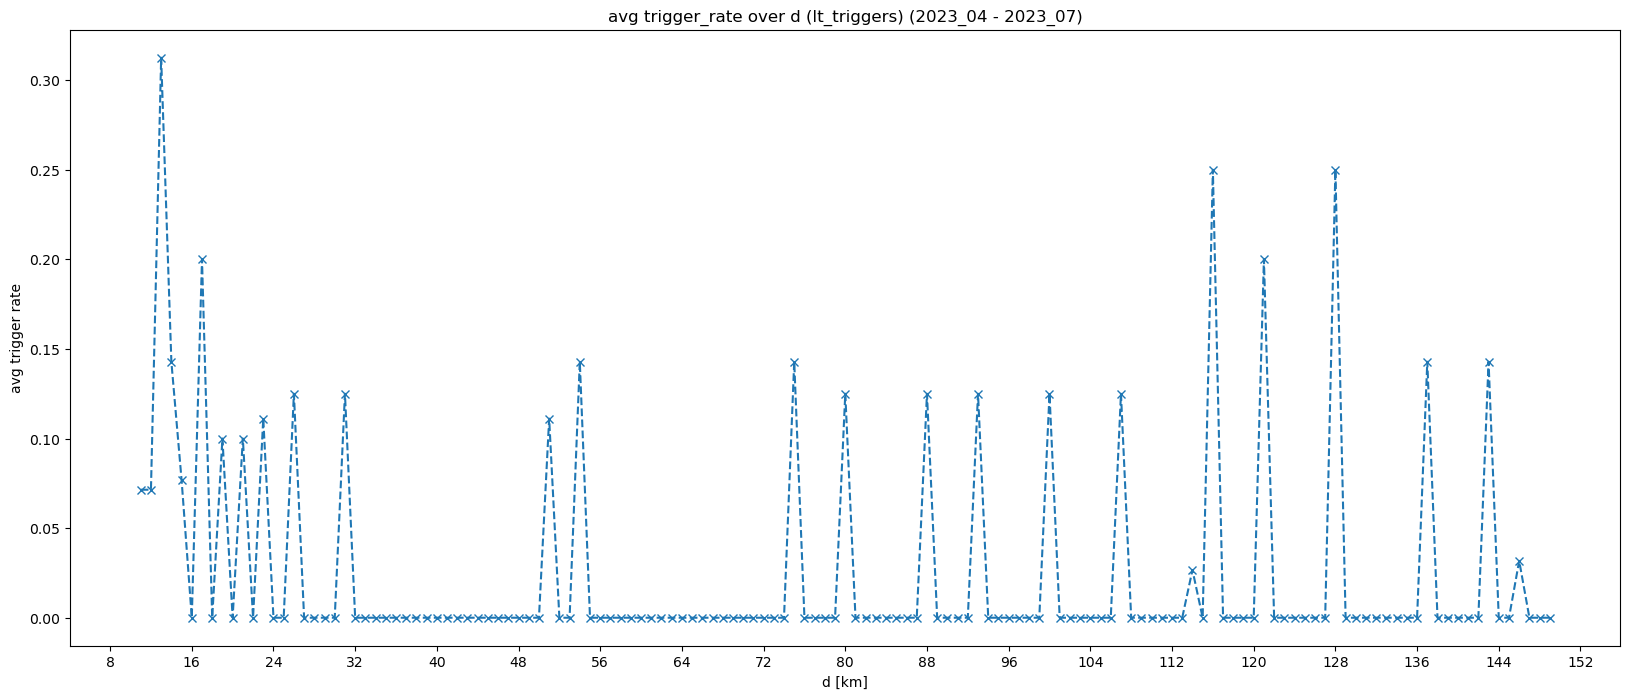

In [21]:
from matplotlib.ticker import MaxNLocator
test = sqldf('Select avg(sum_triggers_per_second) as avg_triggers_per_sec, round(d, 0) as d from result_df group by round(d, 0)')
plt.figure(figsize =(20, 8) ) 
plt.plot(test.d, test.avg_triggers_per_sec, 'x--')
plt.title('avg trigger_rate over d (lt_triggers) (2023_04 - 2023_07)')
plt.xlabel('d [km]')
plt.ylabel('avg trigger rate')
plt.gca().xaxis.set_major_locator(MaxNLocator(20))

Text(0, 0.5, 'count')

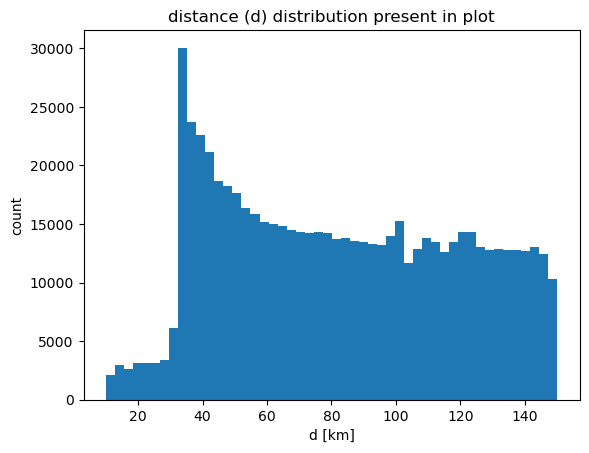

In [27]:
plt.hist(result_df.d, bins = 50)
plt.title('distance (d) distribution present in plot')
plt.xlabel('d [km]')
plt.ylabel('count')

In [20]:
was_ueber_ist = sqldf("Select distinct fk_date_flightnumber from result_df")

In [21]:
min_z = sqldf("Select fk_date_flightnumber, min_z from flights_distinct order by min_z asc")
min_z = min_z[min_z['fk_date_flightnumber'].isin(was_ueber_ist['fk_date_flightnumber'])]
min_z

,fk_date_flightnumber,min_z
78,2023-05-30_HFM313,6.800000000000000
79,2023-06-13_HFM813,6.800000000000000
114,2023-04-16_CES208,7.700000000000000
125,2023-05-29_UAE93Q,7.700000000000000
126,2023-06-10_AIC126,7.700000000000000
...,...,...
2410,2023-06-07_QQE580,11.400000000000000
2413,2023-06-29_QQE252,11.400000000000000
2414,2023-06-30_CFMHL,11.400000000000000
2420,2023-07-18_VJT794,12.000000000000000


In [22]:
test = FlightTracker("2023-07-13 00:00:00", "2023-07-14 00:00:00")
test.flights_distinct

,index,flightnumber,date,filename,mintime,maxtime,min_r,min_z,theta
0,0,N/A,2023-07-13,2023.07.13-234909.db,2023-07-13 05:26:46.600000,2023-07-13 17:19:14.500000,0.700000000000000,0.000000000000000,24.000000000000000
1,1,ELY005,2023-07-13,2023.07.13-234909.db,2023-07-13 05:26:56.700000,2023-07-13 05:42:26.200000,65.799999999999997,9.199999999999999,2.000000000000000
2,2,QTR65R,2023-07-13,2023.07.13-234909.db,2023-07-13 06:00:26.500000,2023-07-13 06:16:56.300000,32.200000000000003,8.300000000000001,18.000000000000000
3,3,THY8JK,2023-07-13,2023.07.13-234909.db,2023-07-13 07:20:14.700000,2023-07-13 07:36:04.300000,74.299999999999997,9.500000000000000,7.000000000000000
4,4,CPA843,2023-07-13,2023.07.13-234909.db,2023-07-13 10:21:52.700000,2023-07-13 10:38:37.600000,70.500000000000000,9.500000000000000,49.000000000000000
5,5,AFR163,2023-07-13,2023.07.13-234909.db,2023-07-13 10:40:58.300000,2023-07-13 10:56:47.900000,13.900000000000000,8.900000000000000,50.000000000000000
6,6,DLH490,2023-07-13,2023.07.13-234909.db,2023-07-13 13:01:19.200000,2023-07-13 13:09:51.700000,136.800000000000011,9.500000000000000,18.000000000000000
7,7,SKIER41,2023-07-13,2023.07.13-234909.db,2023-07-13 14:18:31.700000,2023-07-13 18:07:43.600000,0.600000000000000,0.000000000000000,47.000000000000000
8,8,EDW10K,2023-07-13,2023.07.13-234909.db,2023-07-13 16:01:51.900000,2023-07-13 16:19:47.100000,70.700000000000003,9.800000000000001,10.000000000000000
9,9,RCH108,2023-07-13,2023.07.13-234909.db,2023-07-13 16:19:47.100000,2023-07-13 19:13:42.800000,0.600000000000000,0.000000000000000,47.000000000000000


INFO:runtable_database:database connection to RNOG_live established


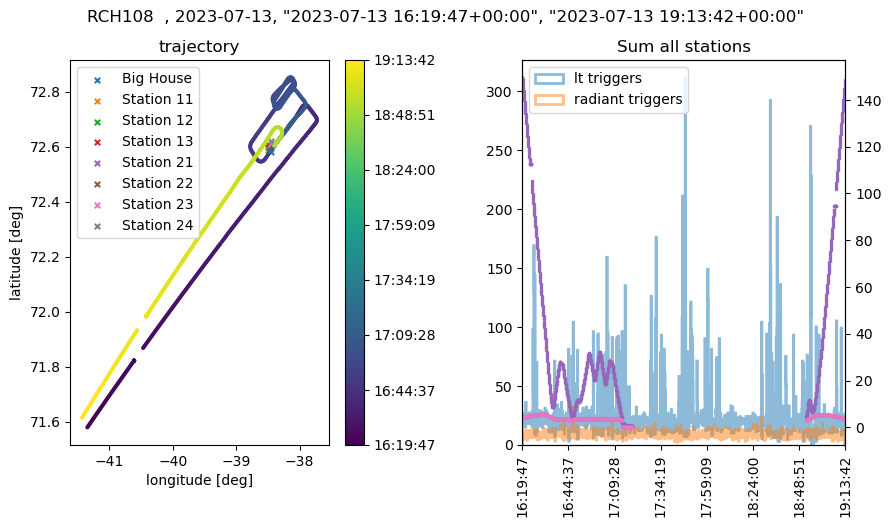

In [23]:
f = test.get_flight_by_index(9, filetype='headers.root')
f.plot_flight()

In [24]:
sqldf("Select * from was_ueber_ist where fk_date_flightnumber like '%RCH%' ")

,fk_date_flightnumber
0,2023-06-18_RCH310


In [25]:
test = FlightTracker("2023-06-18 00:00:00")
test.flights_distinct

,index,flightnumber,date,filename,mintime,maxtime,min_r,min_z,theta
0,0,AFR293,2023-06-18,2023.06.18-025627.db,2023-06-18 01:32:16.600000,2023-06-18 01:50:47.000000,11.300000000000001,8.900000000000000,45.000000000000000
1,1,N/A,2023-06-18,2023.06.18-025627.db,2023-06-18 01:47:56.200000,2023-06-18 01:48:46.500000,80.400000000000006,9.800000000000001,40.000000000000000
2,2,N/A,2023-06-18,2023.06.18-025627.db,2023-06-18 11:53:27.800000,2023-06-18 18:42:37.200000,69.599999999999994,8.100000000000000,67.000000000000000
3,3,CPA843,2023-06-18,2023.06.19-025631.db,2023-06-18 10:48:03.800000,2023-06-18 11:04:23.500000,70.400000000000006,8.900000000000000,49.000000000000000
4,4,N/A,2023-06-18,2023.06.19-025631.db,2023-06-18 01:47:56.200000,2023-06-18 01:48:46.500000,80.400000000000006,9.800000000000001,40.000000000000000
5,5,N/A,2023-06-18,2023.06.19-025631.db,2023-06-18 11:53:27.800000,2023-06-18 18:42:37.200000,69.599999999999994,8.100000000000000,67.000000000000000
6,6,DAL143,2023-06-18,2023.06.19-025631.db,2023-06-18 11:54:18.100000,2023-06-18 12:11:48.200000,32.299999999999997,8.600000000000000,18.000000000000000
7,7,DAL179,2023-06-18,2023.06.19-025631.db,2023-06-18 12:22:31.300000,2023-06-18 12:37:50.800000,32.399999999999999,8.600000000000000,18.000000000000000
8,8,OCN72,2023-06-18,2023.06.19-025631.db,2023-06-18 12:42:22.100000,2023-06-18 12:58:26.800000,32.600000000000001,9.600000000000000,15.000000000000000
9,9,DLH490,2023-06-18,2023.06.19-025631.db,2023-06-18 13:14:21.400000,2023-06-18 13:22:33.800000,136.800000000000011,8.600000000000000,18.000000000000000


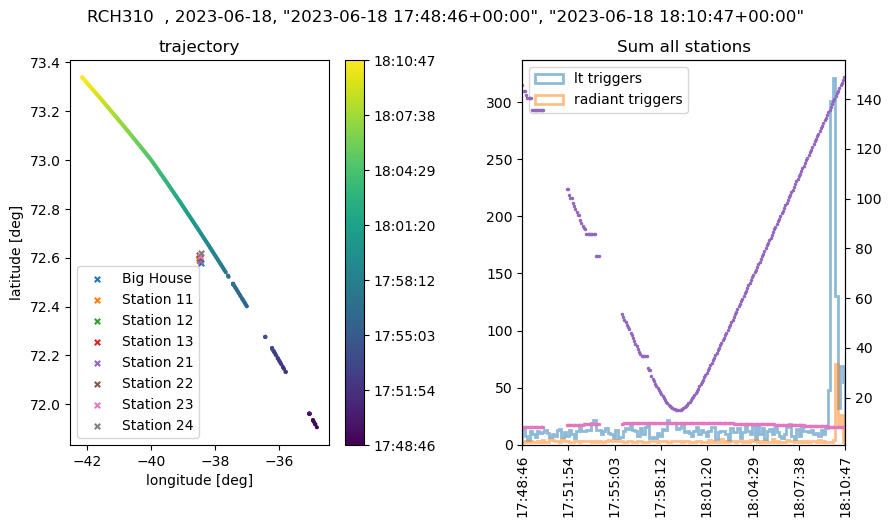

In [26]:
f = test.get_flight_by_index(18, filetype='headers.root')
f.plot_flight()